In [2]:
In this portfolio project we will be looking at data from the stock market, particularly some technology stocks.
We will learn how to use pandas to get stock information, visualize different aspects of it,
and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. 
We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, 
and how to analyze basic attributes of a stock.

#Let's go ahead and start with some imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# For reading stock data from yahoo
from pandas_datareader import data, wb

In [5]:
# For time stamps
from datetime import datetime

In [6]:
Let's use Yahoo and pandas to grab some data for some tech stocks.


# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
# Set up End and Start times for data grab
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [8]:
#For loop for grabing yahoo finance data and setting as a dataframe


for stock in tech_list:
     # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [9]:
Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,129.427412,126.363063,127.968864,127.929160,1.100500e+08,127.471660
std,10.098465,10.395139,10.212962,10.320209,4.835242e+07,10.457707
min,110.190002,103.099998,104.540001,106.839996,4.639770e+07,106.157211
25%,121.989998,118.919998,120.360001,120.589996,7.865750e+07,120.107483
50%,128.000000,125.650002,126.959999,126.849998,9.690650e+07,126.550392
75%,135.380005,133.080002,134.309998,134.139999,1.261428e+08,133.512680
max,151.679993,149.089996,150.229996,151.119995,3.459376e+08,151.119995


In [10]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-08-20 to 2021-08-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

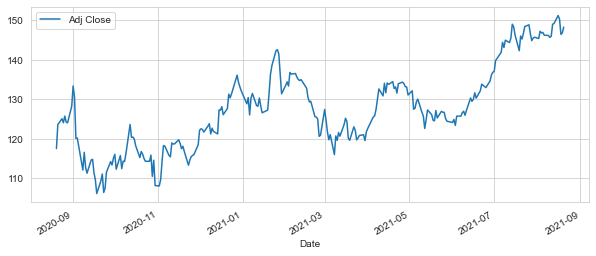

In [11]:
Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

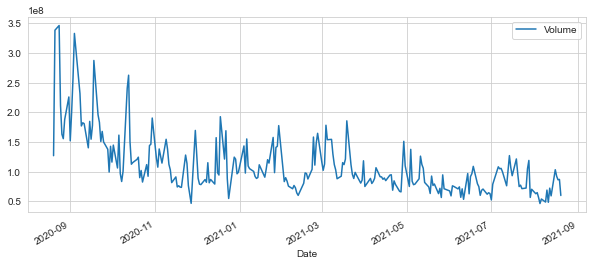

In [12]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

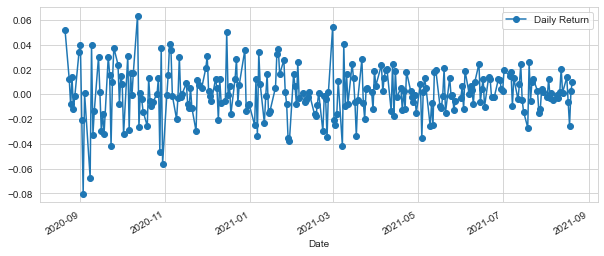

In [13]:
Section 2 - Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. 
We're now going to analyze the risk of the stock. 
In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. 
Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.


# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,marker='o')

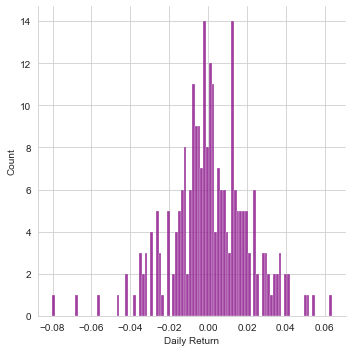

In [14]:
Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
# Could have also done:
#AAPL['Daily Return'].hist()

<AxesSubplot:>

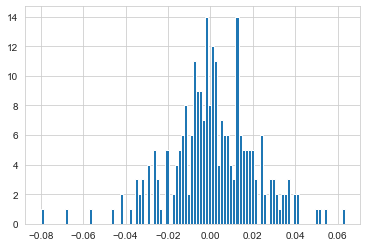

In [15]:
Now what if we wanted to analyze the returns of all the stocks in our list? 
Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

AAPL['Daily Return'].hist(bins=100)

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [17]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-20,117.519142,1581.750000,212.628922,3297.370117
2020-08-21,123.575188,1580.420044,211.083099,3284.719971
2020-08-24,125.053177,1588.199951,211.747009,3307.459961
2020-08-25,124.027283,1608.219971,214.501740,3346.489990
2020-08-26,125.713928,1652.380005,219.139160,3441.850098


In [18]:
Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, 
like we did for the Apple stock.

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
Now we can compare the daily percentage return of two stocks to check how correlated. 
First let's see a sotck compared to itself.

In [19]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-20,NaN,NaN,NaN,NaN
2020-08-21,0.051532,-0.000841,-0.007270,-0.003836
2020-08-24,0.011960,0.004923,0.003145,0.006923
2020-08-25,-0.008204,0.012605,0.013010,0.011801
2020-08-26,0.013599,0.027459,0.021620,0.028496


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


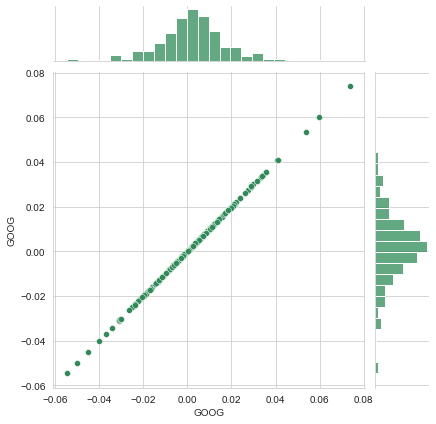

In [20]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color='seagreen')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


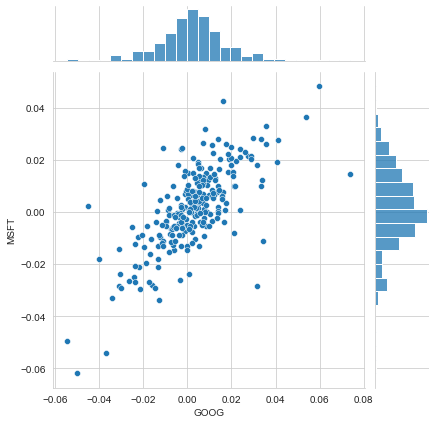

In [21]:
So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 
So let's go ahead and compare Google and Microsoft the same way.

# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter')

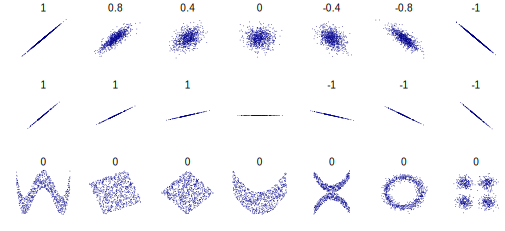

In [90]:
Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give 
you a sense of how correlated the daily percentage returns are.
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')



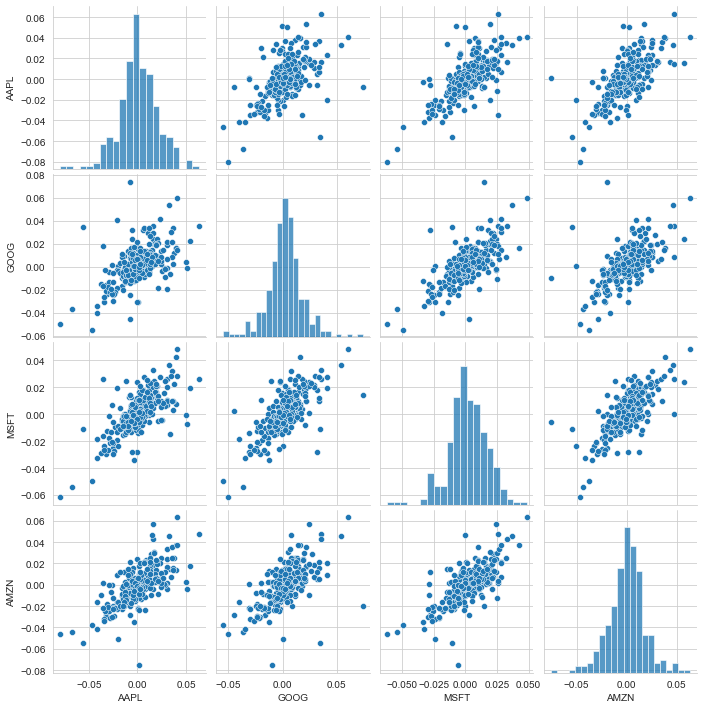

In [23]:
Seaborn and pandas make it very easy to repeat this comparison analysis for every possible
combination of stocks in our technology stock ticker list. 
We can use sns.pairplot() to automatically create this plot

# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

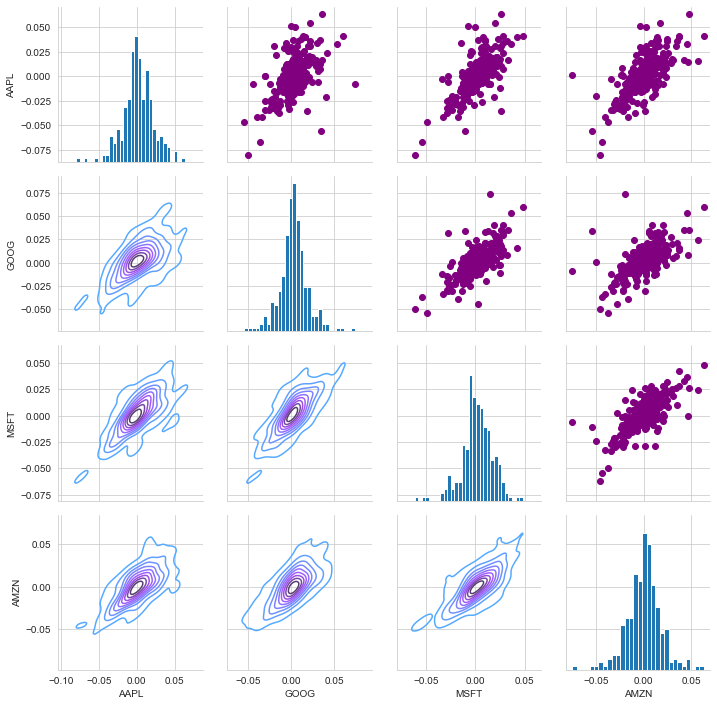

In [24]:
Above we can see all the relationships on daily returns between all the stocks. 
A quick glance shows an interesting correlation between Google and Amazon daily returns. 
It might be interesting to investigate that individual comaprison. 
While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, 
including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. 
Below is an example of utilizing the full power of seaborn to achieve this result.
returns_fig = sns.PairGrid(tech_rets.dropna())


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig.map_upper(plt.scatter,color='purple')
# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

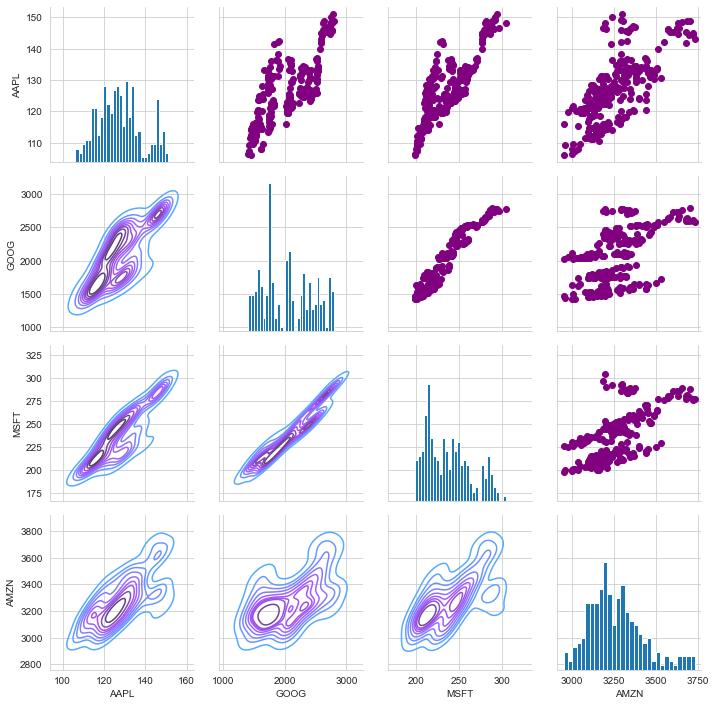

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

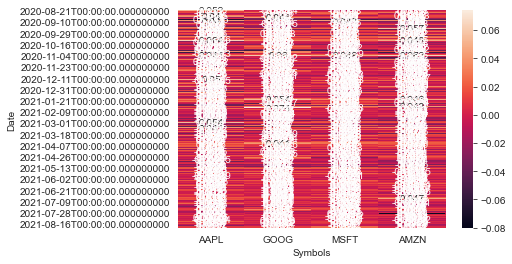

In [26]:
sns.heatmap(tech_rets.dropna(),annot=True)

In [27]:
#Risk Analysis
There are many ways we can quantify risk, 
one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected 
return with the standard deviation of the daily returns.
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

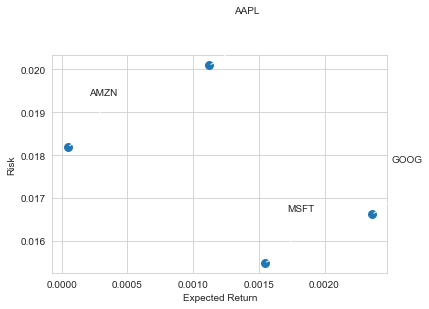

In [32]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)
#Set the plot axis titles
plt.xlabel('Expected Return')
plt.ylabel('Risk')
# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50, 50),
    textcoords = 'offset points',ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3'))

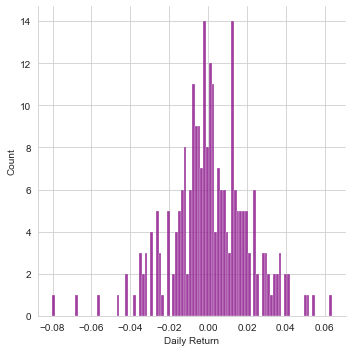

In [33]:
#Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. 
We can treat value at risk as the amount of money we could expect to 
lose (aka putting at risk) for a given confidence interval. 
Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Let's go ahead and repeat the daily returns histogram for Apple stock.

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [34]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-21,0.051532,-0.000841,-0.007270,-0.003836
2020-08-24,0.011960,0.004923,0.003145,0.006923
2020-08-25,-0.008204,0.012605,0.013010,0.011801
2020-08-26,0.013599,0.027459,0.021620,0.028496
2020-08-27,-0.011954,-0.010924,0.024554,-0.012159


In [35]:
Now we can use quantile to get the risk value for the stock
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.032444643441495544

In [57]:
The 0.05 empirical quantile of daily returns is at -0.032. 
That means that with 95% confidence, 
our worst daily loss will not exceed 3.2%. If we have a 1 million dollar investment, 
our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.

Go ahead and repeat this for the other stocks in out portfolio, 
then afterwards we'll look at value at risk by implementing a Monte Carlo method.

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, 
then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations 
to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. 
This means that the stock price follows a random walk and is consistent with (at the very least) 
the weak form of the efficient market hypothesis (EMH): past price information is already incorporated
    and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, 
basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard 
deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$
Now we see that the change in the stock price is the current stock price multiplied by two terms. 

The first term is known as "drift", which is the average daily return multiplied by the change of time. 
The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" 
which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands 
of times, we can begin to do a simulation of where we might expect the stock price to be.

# Set up our time horizon
days = 365
# Now our delta
dt = 1/days
# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['AAPL']
# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['AAPL']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and 
mu we already calculated form out daily returns

In [73]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
  
  # Define a price array
    price = np.zeros(days)
    price[0] = start_price
     # Schok and Drift
    shock = np.zeros(days)
    drift= np.zeros(days)
    # Run price array for number of days
    for x in range(1,days):
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu*dt
        # Calculate Price
        price[x] = price[x-1] + (price[x] + (drift[x] + shock[x]))
        
        return price
    let's put our function to work!

In [74]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2020-08-20,118.392502,115.732498,115.750000,118.275002,126907200.0,117.519142,NaN
2020-08-21,124.867500,119.250000,119.262497,124.370003,338054800.0,123.575188,0.051532
2020-08-24,128.785004,123.937500,128.697495,125.857498,345937600.0,125.053177,0.011960
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.027283,-0.008204
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,125.713928,0.013599


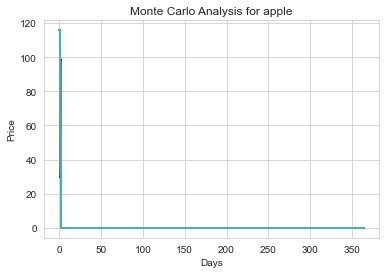

In [85]:
# Get start price from AAPL.head()
start_price = 115.75

for run in range(10000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Monte Carlo Analysis for apple')

In [77]:
Let's go ahead and get a histogram of the end results for a much larger run. 
# Set a large numebr of runs
runs = 1000
# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];



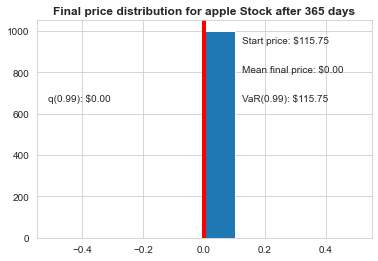

In [81]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=10)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for apple Stock after %s days" % days, weight='bold');